In [8]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer

from nltk.tokenize  import word_tokenize
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.legend as leg

In [2]:
# Set up document text
report = pd.read_csv("open_ave_data2.csv")
report = report.iloc[:,2:6]
report.head()

,findings,clinicaldata,ExamName,impression
0,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.
3,Findings: Heart size appears normal. Lungs cle...,History: Chest pain \n\n,Exam: - CHEST-PORTABLE\n\nComparison: None,Impression: Lungs clear
4,FINDINGS: Lungs/Pleura: No focal opacities evi...,"CLINICAL HISTORY: CHEST PAIN, SHORTNESS OF BRE...",EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,IMPRESSION: Normal single view chest.


In [3]:
# Check df columns
print("- Report df columns:")
print(report.columns)
print()

# Check df shape
print("- Report df shape:")
print(report.shape)
print()

# Convert pandas dataframe --> numpy array --> String
report_arr = report.values
report_arr = report_arr.reshape((report_arr.size,1))
temp_report_list = report_arr.tolist()

# String data Preprocessing: 
## Remove NAN value
imputer = SimpleImputer(strategy='constant', fill_value='')
temp2_report_list = imputer.fit_transform(temp_report_list)

## Force list type --> String type
temp3_report_list = [element[0] for element in temp2_report_list]

## Clean special characters & numeric
nltk.download('punkt') # Download Pre-trained NLP Tokenizer Model
def clean_text(text):
    words = word_tokenize(text)
    clean_text = ' '.join([word for word in words if word.isalpha()])
    return clean_text
report_list = [clean_text(text) for text in temp3_report_list]

# Check array shape
print("- List shape:")
print(len(report_list))
print()

- Report df columns:
Index(['findings', 'clinicaldata', 'ExamName', 'impression'], dtype='object')

- Report df shape:
(954, 4)



[nltk_data] Downloading package punkt to /Users/steveg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


- List shape:
3816



In [4]:
# Generate tfidf embedding
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
# Normalize embedding with L2 
X = vectorizer.fit_transform(report_list)

In [5]:
# Create feature and outcome arrays for ML task
X_arr = X.toarray()
temp_list = []
for row in report.itertuples(index=False):
    for col, cell in enumerate(row):
        temp_list.append(col)
Y_arr = np.array(temp_list)
        
# Train/Test Split(0.8/0.2)
X_train, X_test, Y_train, Y_test = train_test_split(X_arr, Y_arr, test_size=0.2, random_state=1, shuffle=True)

Accuracy Score: 0.9973821989528796



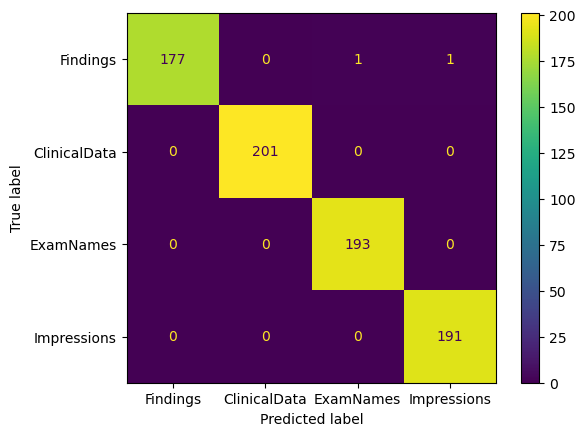

In [6]:
# Model Construction
model = LogisticRegression(penalty='l2', random_state=1, solver='lbfgs', multi_class='multinomial')

# Model Training
model = model.fit(X_train, Y_train)

# Model Prediction
Y_pred = model.predict(X_test)

# Model Evaluation (Accuracy)
score = model.score(X_test, Y_test)
print("Accuracy Score:", score)
print()

# Model Evaluation (Confusion Matrix)
C = confusion_matrix(Y_test, Y_pred, labels=[0,1,2,3])
ConfusionMatrixDisplay(C, display_labels=["Findings", "ClinicalData", "ExamNames", "Impressions"]).plot()

In [11]:
# More Model Evaluation (Classification Report)
print(classification_report(Y_test, Y_pred, target_names=["Findings", "ClinicalData", "ExamNames", "Impressions"]))

              precision    recall  f1-score   support

    Findings       1.00      0.99      0.99       179
ClinicalData       1.00      1.00      1.00       201
   ExamNames       0.99      1.00      1.00       193
 Impressions       0.99      1.00      1.00       191

    accuracy                           1.00       764
   macro avg       1.00      1.00      1.00       764
weighted avg       1.00      1.00      1.00       764

